## Modelo de Classificação 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')



heart = pd.read_csv('heart.csv')
heart.head()

C:\Users\Marcello\Documents\Felipe-Estudos\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Get_dummies     
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

frames = [heart, a, b, c]
heart = pd.concat(frames, axis = 1)
heart = heart.drop(columns = ['cp', 'thal', 'slope'])

# Normalizer 
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [3]:
# K-NN 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 

# Modelo 
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors = número de K 
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {}%".format(7, knn.score(x_test, y_test).round(4)*100))

7 NN Score: 88.52%


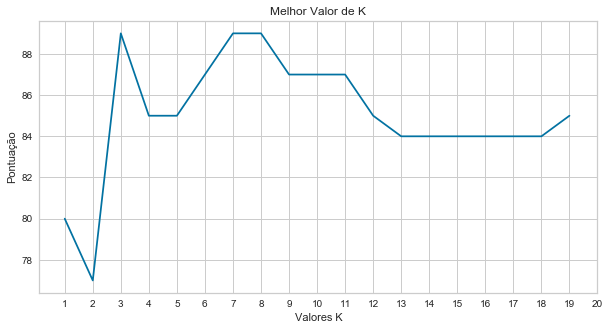

Pontuação Máxima do KNN: 89.0%


In [4]:
# Lista Pontuação 
scoreList = []
    
# Range de K 
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test).round(2)*100)

# Gráfico Valores K 
plt.figure(figsize=(10,5))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,21,1))
plt.ylabel('Pontuação')
plt.xlabel('Valores K')
plt.title('Melhor Valor de K')
plt.show()

# Pontuação máxima 
acc = max(scoreList)
print("Pontuação Máxima do KNN: {}%".format(acc))

In [5]:
# Modelo 
model_knn = KNeighborsClassifier(n_neighbors = 3)  # melhor valor de K = 3 
model_knn.fit(x_train, y_train)
prediction = model_knn.predict(x_test)

print("KNN Score: {}%".format(model_knn.score(x_test, y_test).round(4)*100))

KNN Score: 88.52%


<hr>
<hr>

## Métricas de Classificação 
<hr>

### Classification Report 

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### Matriz de Confusão 

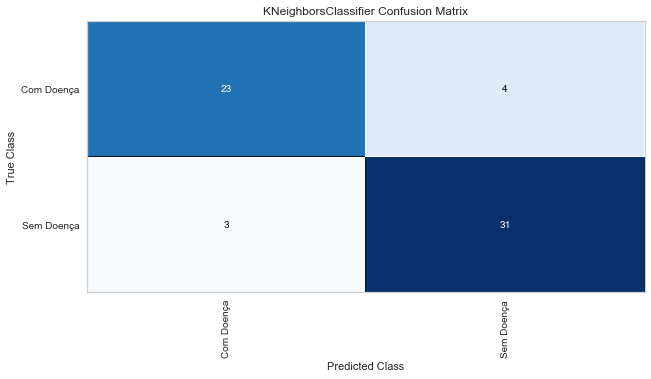

In [7]:
# Matriz de Confusão com Yellowbrick 

from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize=(10,5))

cm = ConfusionMatrix(model_knn, classes=['Com Doença', 'Sem Doença'], cmap='Blues')
cm.score(x_test, y_test)
cm.show()

In [8]:
# Fatiando Matriz de Confusão para calcular métricas a parte 
confusion = confusion_matrix(y_test, prediction)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Accuracy 
Qual frequente o classificador está correto?

In [9]:
# Accuracy 
from sklearn.metrics import accuracy_score

print('Accurácia: {}%'.format(accuracy_score(y_test, prediction, normalize=True).round(4)*100))

# Calculando a acurácia de classificação
print('Accurácia: {}%'.format((TP+TN)/(TP+TN+FP+FN)))

Accurácia: 88.52%
Accurácia: 0.8852459016393442%


### Precision 
A precisão é a porcentagem de predições positivas que estavam corretas. 

In [10]:
# Precision 
from sklearn.metrics import precision_score

print('Precision: {}%'.format(precision_score(y_test,prediction).round(5)*100))

 
print('Precision: {}%'.format(TP/(TP+FP)))

Precision: 88.571%
Precision: 0.8857142857142857%


### Recall  (Sensibilidade)
Quando o valor real é positivo, quão frequente as predições são corretas?

In [11]:
# Recall
from sklearn.metrics import recall_score

print('Recall: {}%'.format(recall_score(y_test,prediction).round(5)*100))

print(TP/(TP+FN))

Recall: 91.176%
0.9117647058823529


### Specificity (Especificidade) 

In [12]:
specificity = TN / (TN+FP).round(5)*100
print('Specificity: {}%'.format((specificity)))

Specificity: 85.18518518518519%


### F1 
É a média Harmônica entre Precision e Recall 

In [13]:
from sklearn.metrics import f1_score 
print('F1: {}%'.format(f1_score(y_test, prediction).round(4)*100))


# Fórmula 
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

F1 = 2 * (precision * recall) / (precision + recall)
print('F1: {}%'.format(F1))

F1: 89.86%
F1: 0.8985507246376812%


<hr>
<br>
<hr>

### Threshold (Limiar de Classificação) 

In [14]:
# Mostrando as 10 primeiras probabilidades das respostas preditas relacionadas as classes
model_knn.predict_proba(x_test)[:10,1]

array([0.        , 0.66666667, 0.66666667, 0.        , 0.        ,
       0.33333333, 0.        , 0.33333333, 0.        , 0.        ])

In [15]:
# Armazenando as probabilidades de predição da Classe 1 
y_pred_proba = model_knn.predict_proba(x_test)[:,1]

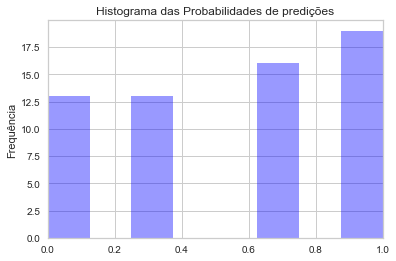

In [16]:
# Histograma das probabilidades de predição 
sns.distplot(y_pred_proba, bins=8, color='blue', kde=False)
plt.title('Histograma das Probabilidades de predições')
plt.ylabel('Frequência')
plt.xlim(0,1)
plt.show()

In [17]:
# Matriz de Confusão (Limiar padrão 0.5)
matriz = confusion_matrix(y_test,prediction, labels=[0,1])
matriz

array([[23,  4],
       [ 3, 31]], dtype=int64)

In [18]:
# Diminuindo o limiar para predição, aumenta a sensibilidade(Recall) do modelo
# por que o modelo terá mais classificações frequêntes para classe positiva TPR. 

# Predizendo doença cardíaca se a probablidade de não ter Doença Cardíaca for maior que 0.15
from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_proba],0.15)[0]
y_pred.shape

(61,)

In [19]:
# Nova matriz de confusão (limiar de 0.15)
print(confusion_matrix(y_test, y_pred))

[[11 16]
 [ 2 32]]


In [20]:
# Aumentou o número de FP do modelo e também classificou os pacientes
# que tinham um probabilidade de ter uma doença cardíaca para classe positiva 
# que é classificada como Sem Doença cardíaca 

In [21]:
 # Sensibilidade foi aumentada (era 0.91)
print(32/(32+2))

0.9411764705882353


In [22]:
# Especificidade foi diminuida (era 0.85)
print(11/(11+16))

0.4074074074074074


##### Conclusão: 

 * Limiar de 0.5 é usado como default (para problemas binários) para converter probabilidades de predição em predição de classes. 

* Limiar pode ser ajustado aumentando a sensibilidade ou a especificidade
* Sensibilidade e Especificidade são inversamente proporcionais
<hr>

In [23]:
print(x_test.shape)

(61, 21)


## Curva ROC 

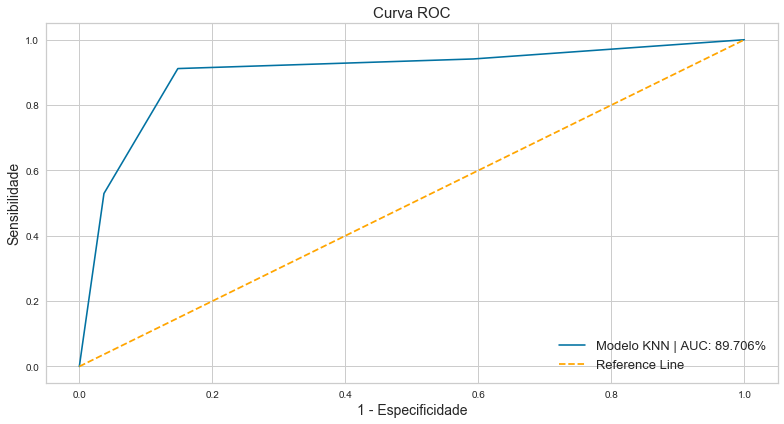

In [40]:
# IMPORTANTE: o primeiro argumento são os valores verdadeiros, segundo argumento são as probabilidades de predição
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades 
y_pred_proba = model_knn.predict_proba(x_test)
y_pred_proba = y_pred_proba[:,1]

# Curva ROC 
fpr,tpr,thresholds = roc_curve(y_test, y_pred_proba)

# Plotando Curva ROC 
plt.figure(figsize=(11,6))
plt.plot(fpr,tpr, marker='', label='Modelo KNN | AUC: {}%'.format(roc_auc_score(y_test, y_pred_proba).round(5)*100), lw=1.6)
plt.plot([0, 1], [0, 1], linestyle='--', label='Reference Line', color='Orange')
plt.xlabel('1 - Especificidade', fontsize=14)
plt.ylabel('Sensibilidade', fontsize=14)
plt.grid(True)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc=4, fontsize=13)
plt.tight_layout()
plt.show()

In [33]:
y_test.shape

(61,)

In [26]:
y_pred_proba.shape

(61,)

* Consigo utilizar a Curva ROC para ajudar a escolher um limiar que balanceie sensibilidade e especificidade de um jeito que faça sentido pra o contexto do seu do projeto. 

In [27]:
# Definindo uma função que recebe um limiar e mostra a sensibilidade e especificidade

def limiar(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [28]:
limiar(0.5)

Sensitivity: 0.9117647058823529
Specificity: 0.8518518518518519


In [29]:
limiar(0.15)

Sensitivity: 0.9411764705882353
Specificity: 0.40740740740740744


<hr>
<hr>

## AUC - Area Under Curve 

* AUC é a porcentagem do gráfico que a curva ocupa.

* AUC é usada como uma métrica que resume a performance do classificador.
* AUC é bastante útil mesmo quando há um dataset desbalanceado.

In [30]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, prediction))

0.8818082788671023


In [31]:
from sklearn.metrics import confusion_matrix

matriz4 = confusion_matrix(y_test, prediction)
matriz4 

array([[23,  4],
       [ 3, 31]], dtype=int64)